In [17]:
import numpy as np
from matplotlib import pyplot
import cv2

In [2]:
pwd

'C:\\Users\\Abhinav Raj\\Downloads\\codes\\tensorflow'

In [3]:
import tensorflow as tf

C:\Users\Abhinav Raj\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Abhinav Raj\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Abhinav Raj\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Abhinav Raj\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [4]:
tf.__version__

'1.14.0'

In [6]:
import keras

Using TensorFlow backend.


In [7]:
keras.__version__

'2.2.0'

In [9]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from xml.dom import minidom

In [19]:
class TableDataset(Dataset):
    def load_dataset(self, dataset_dir, is_train=True):
        self.add_class("dataset", 1, "table")
        images_dir = dataset_dir + '/images/'
        annotations_dir = dataset_dir + '/annots/'
        for filename in listdir(images_dir):
            image_id = filename[:-4]
            
            if is_train and int(image_id) >= 540:
                continue
            if not is_train and int(image_id) < 540:
                continue
            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
            
            
    def extract_boxes(self,filename):
        xmldoc = minidom.parse(filename)
        itemlist = xmldoc.getElementsByTagName('Coords')
        boxes = list()
        for s in itemlist:
            k = s.attributes['points'].value.split(',')
            min_coords = k[1].split(' ')
            max_coords = k[3].split(' ')
            xmin, ymin, xmax, ymax = int(min_coords[1]), int(min_coords[0]), int(max_coords[1]), int(max_coords[0])
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)
        dir_path, img_name = filename.split('annots')
        #print('dir path', dir_path)
        #print('img_name',img_name)
        img_address = dir_path+'\images'+img_name.split('.xml')[0]+'.jpg'
        #print(img_address)
        img = cv2.imread(img_address)
        width, height, _ = img.shape
        return boxes, width , height
    

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        path = info['annotation']
        boxes, w, h = self.extract_boxes(path)
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('table'))
        return masks, asarray(class_ids, dtype='int32')

    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

In [20]:
train_set = TableDataset()
train_set.load_dataset('C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\Table', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

Train: 539


In [21]:
test_set = TableDataset()
test_set.load_dataset('C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\Table', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Test: 61


In [31]:
# load an image
image_id = 1
image = train_set.load_image(image_id)
print(image.shape)
# load image mask
mask, class_ids = train_set.load_mask(image_id)
print(mask.shape)

(1123, 794, 3)
(794, 1123, 4)


In [32]:
class_ids

array([1, 1, 1, 1])

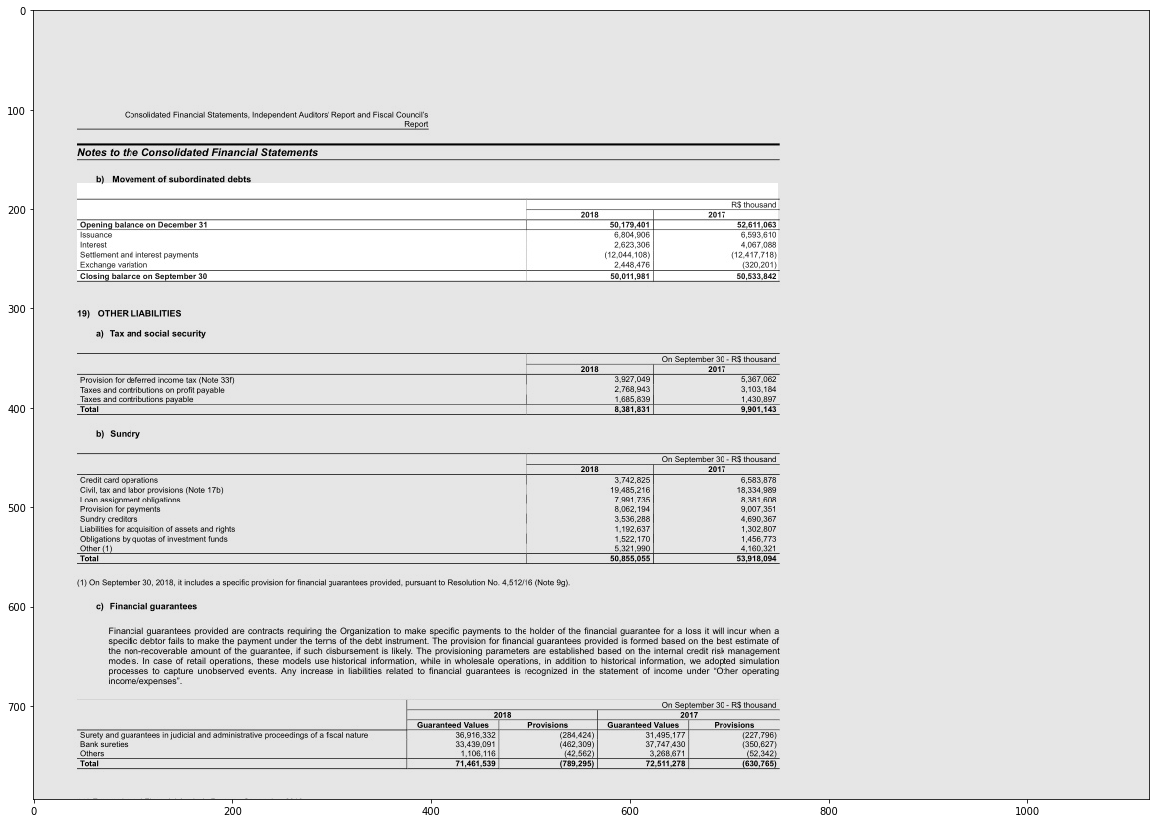

In [33]:
pyplot.figure(figsize=(20,20))
pyplot.imshow(image)
pyplot.imshow(mask[:, :, 0], cmap='gray', alpha=0.1)
pyplot.show()

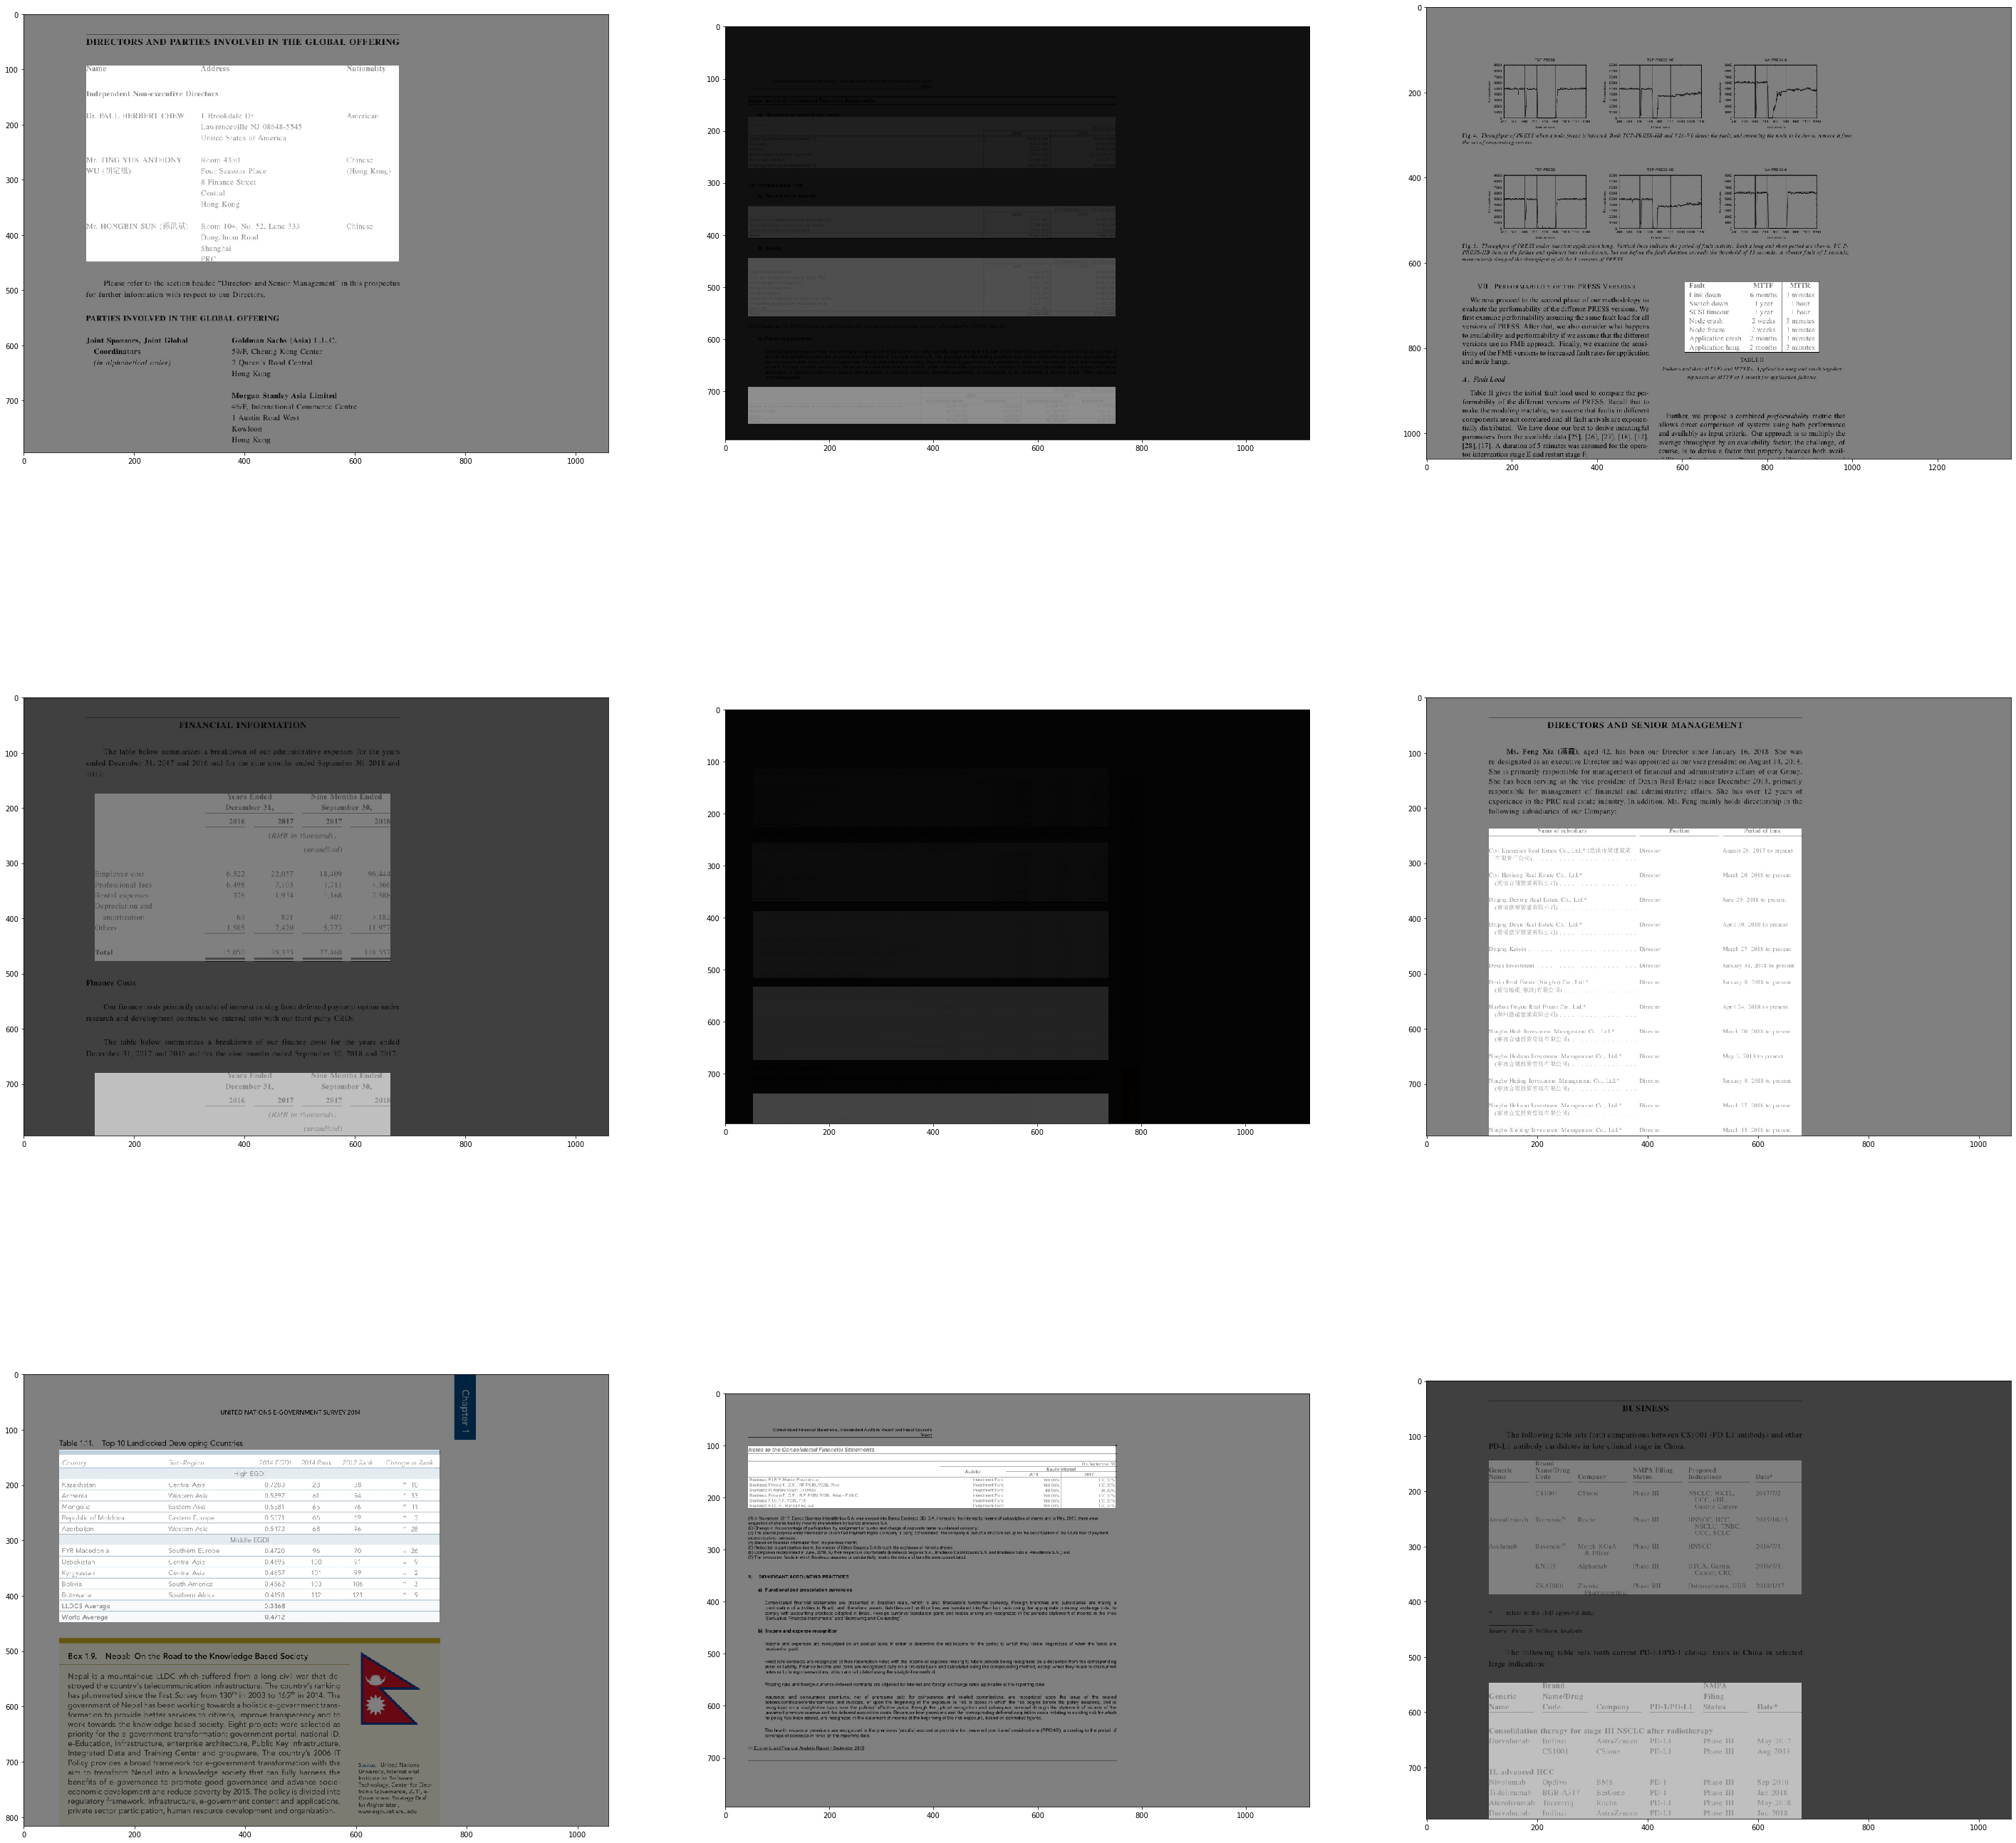

<Figure size 1440x1440 with 0 Axes>

In [35]:
pyplot.figure(figsize=(50,50))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	image = train_set.load_image(i)
	pyplot.imshow(image)
	# plot all masks
	mask, _ = train_set.load_mask(i)
	for j in range(mask.shape[2]):
		pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.5)
# show the figure
pyplot.figure(figsize=(20,20))
pyplot.show()

In [36]:
# enumerate all images in the dataset
for image_id in train_set.image_ids:
	# load image info
	info = train_set.image_info[image_id]
	# display on the console
	print(info)

{'id': '00001', 'source': 'dataset', 'path': 'C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\Table/images/00001.jpg', 'annotation': 'C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\Table/annots/00001.xml'}
{'id': '00002', 'source': 'dataset', 'path': 'C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\Table/images/00002.jpg', 'annotation': 'C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\Table/annots/00002.xml'}
{'id': '00003', 'source': 'dataset', 'path': 'C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\Table/images/00003.jpg', 'annotation': 'C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\Table/annots/00003.xml'}
{'id': '00004', 'source': 'dataset', 'path': 'C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\Table/images/00004.jpg', 'annotation': 'C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\Table/annots/00004.xml'}
{'id': '00005', 'source': 'dataset', 'path': 'C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\Table/images/00005.jpg', 'annotation': 'C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\Table/anno

In [37]:
# define a configuration for the model
class TableConfig(Config):
	# Give the configuration a recognizable name
	NAME = "table_cfg"
	# Number of classes (background + kangaroo)
	NUM_CLASSES = 1 + 1
	# Number of training steps per epoch
	STEPS_PER_EPOCH = 539

# prepare config
config = TableConfig()

In [38]:
# define the model
model = MaskRCNN(mode='training', model_dir='./', config=config)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [40]:
# load weights (mscoco)
model.load_weights('mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])

In [ ]:
# train weights (output layers or 'heads')
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=5, layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: ./table_cfg20200520T1238\mask_rcnn_table_cfg_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeD

C:\Users\Abhinav Raj\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\Abhinav Raj\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\Abhinav Raj\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
 16/539 [..............................] - ETA: 7:51:42 - loss: 3.2946 - rpn_class_loss: 0.1275 - rpn_bbox_loss: 1.3051 - mrcnn_class_loss: 0.0785 - mrcnn_bbox_loss: 1.0515 - mrcnn_mask_loss: 0.7320